In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Tải dữ liệu từ file CSV
df = pd.read_csv('/content/drive/MyDrive/AI/Bai_tap/IMDB-Dataset.csv')

# Loại bỏ các dòng trùng lặp
df = df.drop_duplicates()

# Kiểm tra dữ liệu
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.8 MB/s eta 0:00:00


In [6]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions
# Tải các gói của NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Tập hợp các stopwords
stop = set(stopwords.words('english'))

# Hàm tiền xử lý văn bản
def preprocess_text(text):
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, "html.parser")  # Loại bỏ thẻ HTML
    text = soup.get_text()
    text = contractions.fix(text)  # Mở rộng các từ viết tắt
    text = re.sub(r"http\S+", "", text)  # Loại bỏ URL
    text = "".join([char for char in text if char not in string.punctuation])  # Loại bỏ dấu câu
    text = " ".join([wl.lemmatize(word.lower()) for word in text.split() if word not in stop and word.isalpha()])  # Lemmatization
    return text

# Áp dụng tiền xử lý cho cột 'review'
df['review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-6-c93acf895b25>:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")  # Loại bỏ thẻ HTML


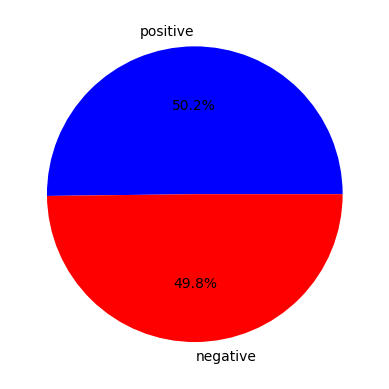

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thống kê số lượng các nhãn
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

# Vẽ biểu đồ tròn
data = [freq_pos, freq_neg]
labels = ['positive', 'negative']
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['blue', 'red'])
plt.show()

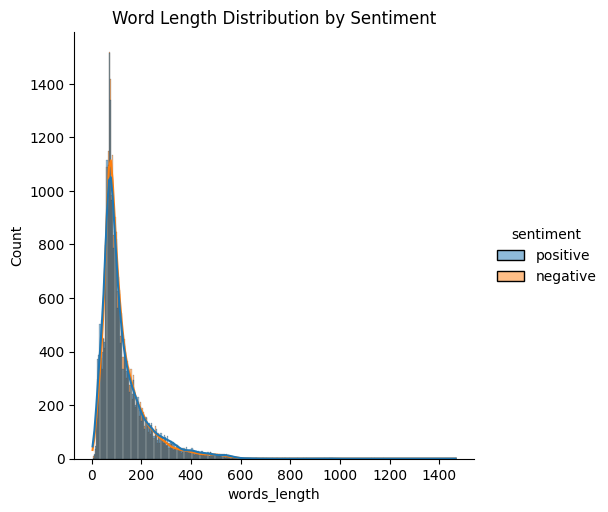

In [8]:
# Tính độ dài của mỗi đánh giá
df['words_length'] = df['review'].str.split().map(lambda x: len(x))

# Vẽ biểu đồ phân phối độ dài đánh giá
sns.displot(df, x="words_length", hue="sentiment", kde=True)
plt.title('Word Length Distribution by Sentiment')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Mã hóa nhãn thành số
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Chia tập dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment_encoded'], test_size=0.2, random_state=42)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Khởi tạo TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Biểu diễn văn bản thành vector
X_train_encoded = tfidf_vectorizer.fit_transform(X_train)
X_test_encoded = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo và huấn luyện Decision Tree
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train_encoded, y_train)

# Dự đoán và đánh giá mô hình
y_pred_dt = dt_classifier.predict(X_test_encoded)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo và huấn luyện Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_encoded, y_train)

# Dự đoán và đánh giá mô hình
y_pred_rf = rf_classifier.predict(X_test_encoded)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))